In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('archive.zip')
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
...,...,...,...,...,...,...,...
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600


In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
5,2000/4/3,3.500000,3.703125,3.437500,3.437500,3.437500,11486800
6,2000/4/4,3.531250,3.578125,3.093750,3.500000,3.500000,13136800
7,2000/4/5,3.468750,3.562500,3.453125,3.484375,3.484375,6349600
8,2000/4/6,3.500000,3.593750,3.468750,3.578125,3.578125,7181200
9,2000/4/7,3.593750,3.812500,3.593750,3.609375,3.609375,13904800


In [5]:
df.shape

(4392, 7)

In [6]:
df1=df.reset_index()['Close']

In [7]:
df1.head()
df1.shape

(4392,)

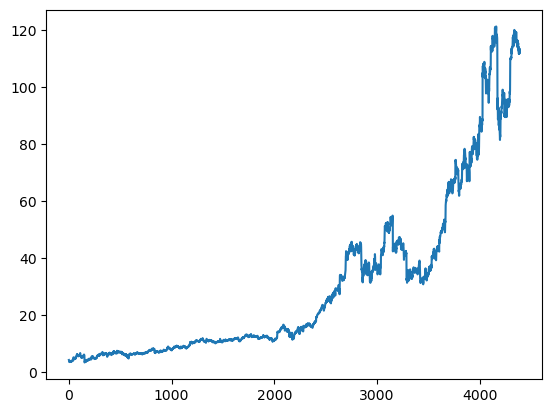

In [8]:
plt.plot(df1)

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import keras 
get_ipython().system('pip install keras')
from keras.models import Sequential
get_ipython().system('pip install tensorflow')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [14]:
sc = MinMaxScaler(feature_range = (0,1))

In [16]:
df1 = sc.fit_transform(np.array(df1).reshape(-1,1))
df1


array([[0.00740835],
       [0.0064823 ],
       [0.00635001],
       ...,
       [0.9226992 ],
       [0.92363047],
       [0.9308272 ]])

In [17]:
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data=df1[0:train_size,:]
test_data=df1[train_size:len(df1),:1]
train_size,test_size

(2854, 1538)

In [18]:
import numpy
def create_ds(dataset, time_step=1):
    x,y = [], []
    for i in range(len(dataset)-time_step-1):
        #i = 0...100
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i+time_step,0])
    return numpy.array(x), numpy.array(y)

In [19]:
time_step = 100
x_train, y_train = create_ds(train_data, time_step)
x_test, y_test = create_ds(test_data, time_step)

In [20]:
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)


(2753, 100)
(2753,)
(1437, 100)
(1437,)


(None, None)

In [21]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [22]:
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (100,1)))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(LSTM(units = 50))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
algo.summary()
algo.fit(x_train, y_train, validation_data = (x_test,y_test),epochs = 50, batch_size =64, verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
44/44 [==============================] - 15s 210ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 2/50
44/44 [==============================]

In [24]:
train_pred=algo.predict(x_train)
test_pred=algo.predict(x_test)
train_pred = sc.inverse_transform(train_pred)
test_pred = sc.inverse_transform(test_pred)


45/45 [==============================] - 1s 26ms/step


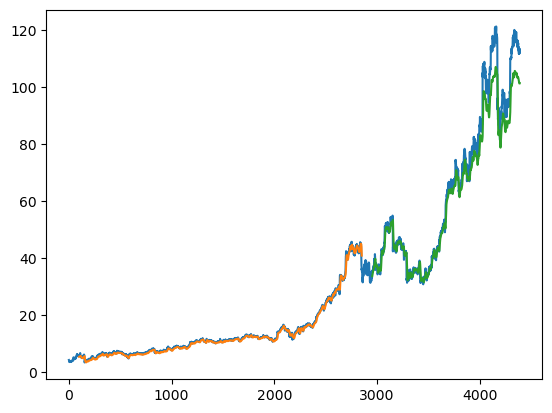

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))
math.sqrt(mean_squared_error(y_test,test_pred))
look_back = 100
trainpredictplot = numpy.empty_like(df1)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_pred)+ look_back, :] = train_pred
testpredictplot = numpy.empty_like(df1)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_pred)+ (look_back*2)+1:len(df1)-1, :] = test_pred
plt.plot(sc.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [27]:
len(test_data)
x_input = test_data[1666:].reshape(1,-1)
x_input.shape
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [29]:
import numpy as np 
temp_input = [0.0] * 100 
list_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = algo.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        list_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = algo.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        list_output.extend(yhat.tolist())
        i = i + 1

print(list_output)


0 day output [[-0.00335053]]
1 day input [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         

In [30]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

(4392, 1)


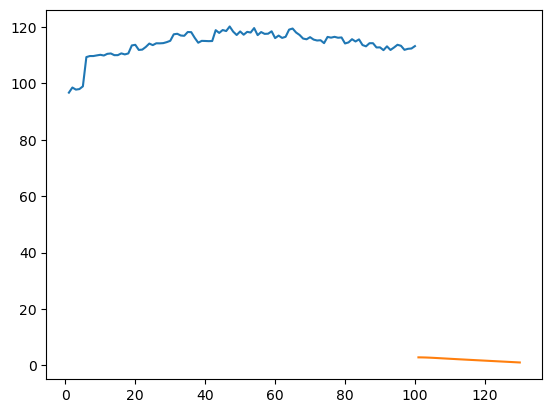

In [35]:
import matplotlib.pyplot as plt
print(df1.shape)
start_index = len(df1) - 100
if start_index >= 0 and len(list_output) > 0:
    plt.plot(day_new, sc.inverse_transform(df1[start_index:]))
    plt.plot(day_pred, sc.inverse_transform(list_output))
    plt.show()
else:
    print("No data available for plotting.")


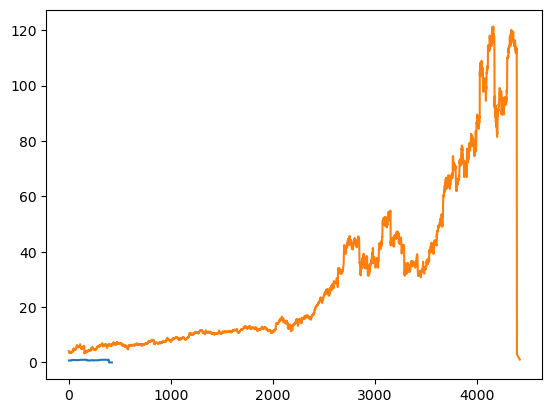

In [36]:
df3 = df1.tolist()
df3.extend(list_output)
plt.plot(df3[4000:])


df3 = sc.inverse_transform(df3).tolist()
plt.plot(df3)